<a href="https://colab.research.google.com/github/ChrisMath26/Fisica-Computacional/blob/main/PDES/PDES_Frontera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuaciones Diferenciales en Derivadas Parciales (PDE)

Los problemas en física tienen variaciones tanto en el espacio como en el tiempo. Esto da lugar a fenómenos mucho más interesantes que deben ser modelados a través de PDEs. Alguno ejemplos de fenómenos físicos modelados en PDEs son

    * Ecuación de Difusión
    * Ecuaciones de Maxwell
    * Ecuaciones de Laplace y Poisson
    * Ecuación de Schrodinger
    


## Potencial electrostático

Consideremos el problema de la figura:

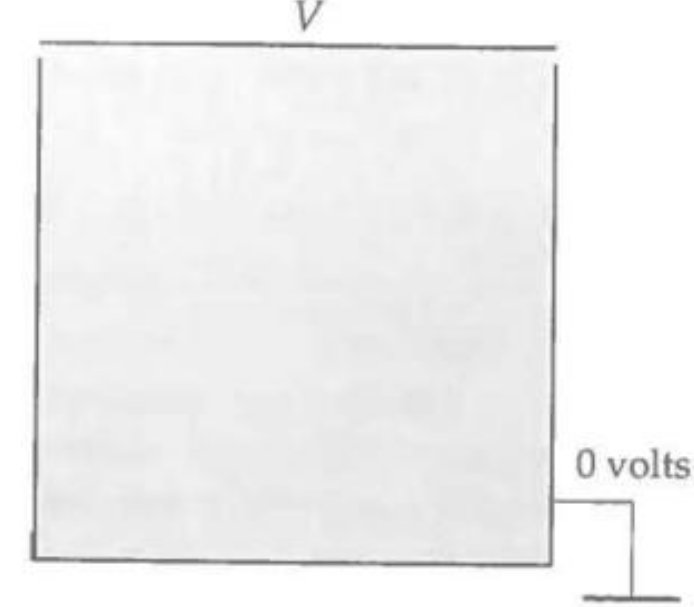

El potencial electrostático $\phi$ se relaciona con el campo eléctrico $\mathbf{E}$ a travṕes de la ecuación

$$
\nabla \phi = \mathbf{E}
$$

donde $\nabla = (\frac{\partial}{\partial x}, \frac{\partial}{\partial y}, \frac{\partial}{\partial z})$. Las ecuaciones de Maxwell no dicen que, si dentro de la caja no hay cargas:

$$
\nabla \cdot \mathbf{E} = 0
$$

Combinando las ecuaciones anteriores, y considerando una caja 2-dimensional el potencial electrostático se rige por

$$
\nabla^2 \phi = 0
$$

o

$$
\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0
$$

Esta se conoce como **Ecuación de Laplace**

### Método de Jacobi (Relajación)

Recordando que la expansión en diferencias finitas de la segunda derivada se puede expresar como:

$$
\frac{\partial^2 \phi}{\partial x^2} = \frac{\phi(x+a,y)+\phi(x-a,y)-2\phi(x,y)}{a^2} \\
\frac{\partial^2 \phi}{\partial y^2} = \frac{\phi(x,y+a)+\phi(x,y-a)-2\phi(x,y)}{a^2}
$$

De la ecuación de Laplace puedo despejar $\phi(x,y)$ como

$$
\phi(x,y)=\frac{1}{4}[\phi(x+a,y)+\phi(x-a,y)+\phi(x,y+a)+\phi(x,y-a)]
$$

sujeto a las condiciones de frontera

$$
\phi(x,y=L)=V \\
\phi(x=0,y)=\phi(x=L,y)=\phi(x,y=0)=0
$$


Halle la forma del potencial electrostático al interior de la caja de la explicación anterior usando el método de Jacobi. Asuma que la caja tiene 1 metro de cada lado y $V=1$V en el borde superior. Haga un espaciado de $a=1$cm para el método numérico.

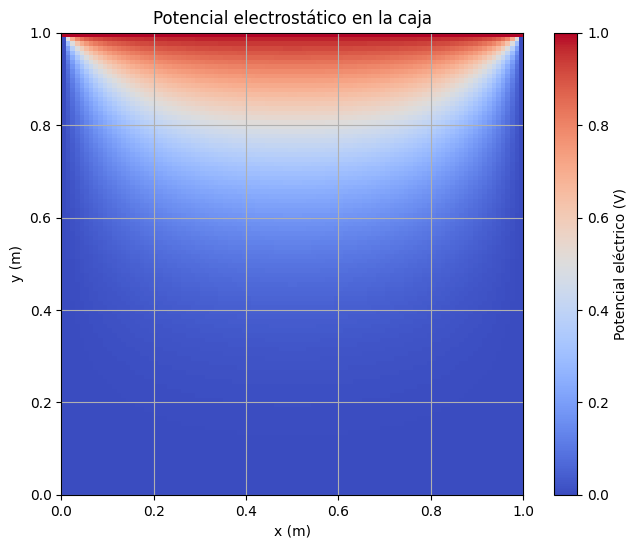

In [ ]:
from scipy.integrate import solve_bvp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# Parámetros
tol = 1e-4
V = 1
M = 100 # Número de puntos de la malla en una dimensión (la malla es MxM)
a = 0.01  #  # Espaciado de 1 cm entre puntos en la malla
L = 1     # Longitud de un lado de la caja

# Inicialización de matrices
phi_old = np.zeros((M, M))  # Matriz para almacenar el potencial eléctrico en el paso anterior
# Garantizar las condiciones de frontera: potencial en el borde superior de la caja
phi_old[0, :] = V
phi_new = np.copy(phi_old) # Matriz para almacenar el potencial eléctrico en el paso actual
delta = 100 # Valor inicial para el cambio máximo en el potencial entre iteraciones

# Calcular coordenadas espaciales
x = np.linspace(0, L, M)
y = np.linspace(0, L, M)
X, Y = np.meshgrid(x, y) # Crear una rejilla de coordenadas a partir de x e y

# Método de Jacobi
while delta > tol:
  for i in range(1, len(x)-1): # Iterar sobre los puntos interiores de la malla
    for j in range(1, len(y)-1):
      phi_new[i,j] = 0.25*(phi_old[i+1,j] + phi_old[i-1,j] + phi_old[i,j+1] + phi_old[i,j-1])
  delta = np.max(np.abs(phi_new - phi_old))
  phi_old = np.copy(phi_new)
# Graficar el potencial electrostático resultante
plt.figure(figsize=(8, 6))
plt.imshow(phi_new, cmap=cm.coolwarm, extent=[0, L, 0, L])
plt.colorbar(label='Potencial eléctrico (V)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Potencial electrostático en la caja')
plt.grid(True)
plt.show()


### Método de Gauss-Siedel

El método de Jacobi puede ser resumido como

$$
\phi_{new}(i,j)=\frac{1}{4}[\phi_{old}(i+1,j) + \phi_{old}(i-1,j) + \phi_{old}(i,j+1) + \phi_{old}(i,j-1)]
$$

El método de Gauss-Siedel hace uso de los valores nuevos a medida que estos se vayan haciendo disponibles, así

$$
\phi_{new}(i,j)=\frac{1}{4}[\phi_{old}(i+1,j) + \phi_{new}(i-1,j) + \phi_{old}(i,j+1) + \phi_{new}(i,j-1)]
$$


Implemente el método de Gauss-Siedel y determine el número de pasos requeridos para llegar a la tolerancia deseada. Compare este valor con el del ejercicio 1.

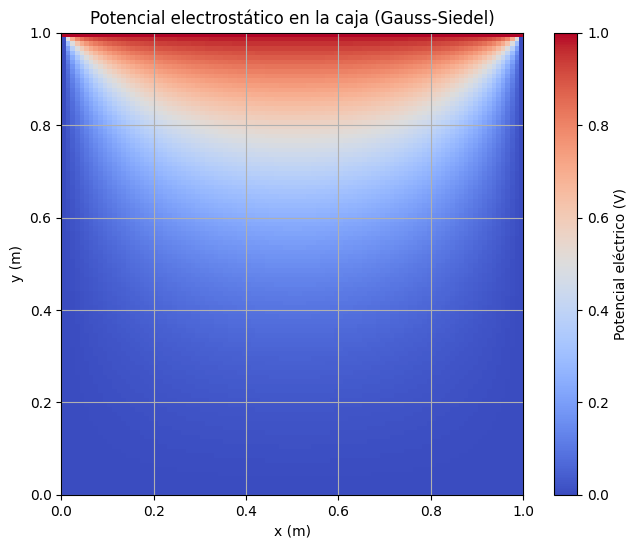

In [ ]:
# Parámetros
tol = 1e-4
V = 1       # Potencial en el borde superior de la caja
M = 100     # Número de puntos de la malla en una dimensión (la malla es MxM)
phi = np.zeros([M, M])  # Matriz para almacenar el potencial eléctrico
phi[0, :] = V  # Condiciones de frontera: potencial en el borde superior de la caja
delta = 100  # Valor inicial para el cambio máximo en el potencial entre iteraciones

# Método de Gauss-Siedel
while delta > tol:
    step_tol = 0
    for i in range(1, len(x)-1):  # Iterar sobre los puntos interiores de la malla
        for j in range(1, len(y)-1):
            # Calcular el nuevo valor del potencial eléctrico en el punto (i, j) utilizando el método de Gauss-Seidel
            new_value = 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1])
            diff = new_value - phi[i, j]  # Calcular la diferencia entre el nuevo y el viejo valor del potencial
            phi[i, j] = new_value  # Actualizar el valor del potencial eléctrico en el punto (i, j)
            if np.abs(diff) > step_tol:  # Actualizar la mayor diferencia en el potencial en esta iteración
                step_tol = np.abs(diff)
    delta = step_tol  # Actualizar el cambio máximo en el potencial entre iteraciones

# Graficar el potencial electrostático resultante
plt.figure(figsize=(8, 6))
plt.imshow(phi, cmap=cm.coolwarm, extent=[0, 1, 0, 1])
plt.colorbar(label='Potencial eléctrico (V)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Potencial electrostático en la caja (Gauss-Siedel)')
plt.grid(True)
plt.show()

### Método de sobrerelajación

El método de la relajación (Gauss-Siedel) actualiza el valor $\phi_{new}(i,j)=\phi_{old}(i,j)+\Delta \phi(i,j)$ de una forma muy conservativa. En el método de sobrerelajación le damos un "boost" al valor actualizado así:

$$
\phi_{new}(i,j)=\phi_{old}(i,j)+\alpha \Delta \phi(i,j)
$$

donde $1<\alpha<2$ es el factor de sobre-relajación.

### Ejercicio 3

La figura a continuación muestra el caso de la caja 2-dimensional en la que hay cargas al interior. En ese caso, la ley de Maxwell nos dice que $\nabla \cdot \mathbf{E} = -\frac{\rho(x,y)}{\epsilon_0}$, o equivalentemente

$$
\nabla^2 \phi = -\frac{\rho(x,y)}{\epsilon_0}
$$

donde $\rho(x,y)$ indica la densidad de carga eléctrica en el punto $(x,y)$. Suponga que las paredes se encuentran a un valor de potencial $V=0$ y que la densidad de carga de las cargas al interior es de $ \pm 1Cm^{-2}$. Las cargas se asumen cuadradas de 20cm de lado y se encuentran a una distancia de 20cm de las paredes más cercana. Suponga que $\epsilon_0 = 1$ y $a=1$cm

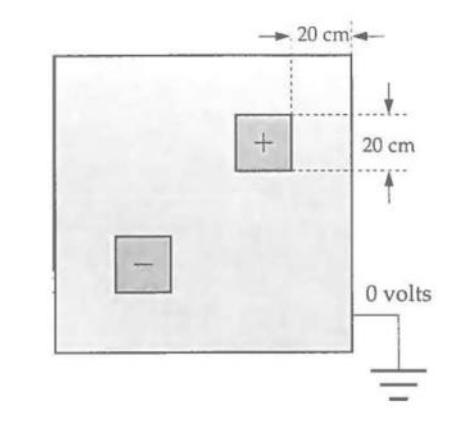

Expandiendo en diferencias finitas y resolviendo para $\phi(x,y)$ se obtiene

$$
\phi(x,y)=\frac{1}{4}[\phi(x+a,y) + \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a)]+\frac{a^2}{4\epsilon_0}\rho(x,y)
$$

Utilice el método de Gauss-Siedel con sobrerelajación para resolver este ejercicio

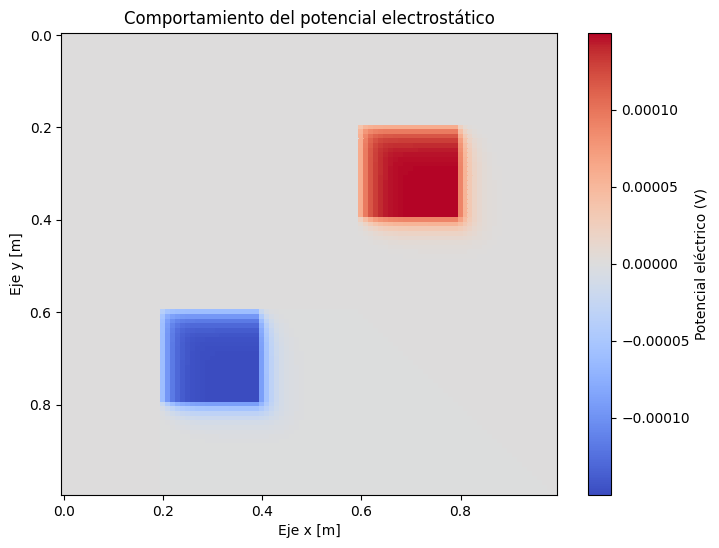

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Paso 1: Definir una rejilla ("mesh") en donde almacenar la solución
a = 0.01  # Espaciado de 1 cm
x = np.arange(0, 1, a)  # Coordenadas en el eje x
y = np.arange(0, 1, a)  # Coordenadas en el eje y
phi = np.zeros([len(x), len(y)])  # Matriz para almacenar el potencial eléctrico

# Parámetros
e_0 = 1  # Permitividad del vacío
cargas = np.zeros([len(x), len(y)])  # Matriz para almacenar la densidad de carga eléctrica
C = 1  # Valor de la densidad de carga de las cargas al interior
cargas[20:40, -40:-20] = C  # Definir la densidad de carga positiva
cargas[-40:-20, 20:40] = -C  # Definir la densidad de carga negativa
delta = 1  # Valor inicial para el cambio máximo en el potencial entre iteraciones
tol = 1e-4  # Tolerancia para la convergencia del método
alpha = 1.5  # Factor de sobrerelajación

# Método de Gauss-Siedel con sobrerelajación
while delta > tol:
    step_tol = 0  # Valor inicial para el cambio máximo en el potencial en esta iteración
    for i in range(1, len(x) - 1):  # Iterar sobre los puntos interiores de la malla en el eje x
        for j in range(1, len(y) - 1):  # Iterar sobre los puntos interiores de la malla en el eje y
            # Calcular el nuevo valor del potencial eléctrico en el punto (i, j) utilizando el método de Gauss-Seidel con sobrerelajación
            new_value = 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) + (a ** 2 / 4 * e_0) * cargas[i, j]
            # Calcular la diferencia entre el nuevo y el viejo valor del potencial
            diff = new_value - phi[i, j]
            # Actualizar el valor del potencial eléctrico en el punto (i, j) con sobrerelajación
            phi[i, j] = phi[i, j] + alpha * diff
            # Actualizar el cambio máximo en el potencial en esta iteración
            if np.abs(diff) > step_tol:
                step_tol = np.abs(diff)
    # Actualizar el cambio máximo en el potencial entre iteraciones
    delta = step_tol

# Graficar el potencial electrostático resultante
plt.figure(figsize=(8, 6))
plt.pcolor(x, y, phi, cmap=cm.coolwarm)
plt.title('Comportamiento del potencial electrostático')
plt.xlabel('Eje x [m]')
plt.ylabel('Eje y [m]')
plt.colorbar(label='Potencial eléctrico (V)')
plt.gca().invert_yaxis()
plt.show()

